In [1]:
import numpy as np
import pandas as pd
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import requests 
import time
import re

# pip install geopy
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings("ignore")

from geopy_functions import *
from my_functions import *

**WRONG ORIGINS**

Frank Turner = not Bahrain

# **Locations Wikipedia scraping**

In [2]:
df_ratings = pd.read_csv('Datasets/df_ratings_top.csv', keep_default_na=False)

print(f"{df_ratings['artist'].nunique()} artists")
print(f"{df_ratings.shape[0]} albums")
print(f"Average of {round(df_ratings.shape[0] / df_ratings['artist'].nunique(), 2)} albums per artist in the df that has all the albums with any ratings")

23683 artists
79625 albums
Average of 3.36 albums per artist in the df that has all the albums with any ratings


In [3]:
df = pd.read_csv('Datasets/df_rock_ratings.csv', keep_default_na=False)

print(f"{df['artist'].nunique()} artists")
print(f"{df.shape[0]} albums")
print(f"Average of {round(df.shape[0] / df['artist'].nunique(), 2)} albums per artist in the subset with the albums with more than 10 votes")

5094 artists
12061 albums
Average of 2.37 albums per artist in the subset with the albums with more than 10 votes


## Testing

In [28]:
df.sample(5)

,artist,title,year,album_length,tracks,genres,styles,release_country,artist_profile
10580,The 1975,A Brief Inquiry into Online Relationships,2018,58.43,15,"['Rock', 'Pop']","['Indie Rock', 'Alternative Rock', 'Indie Pop']",UK & Europe,British indie rock band. \r\n\r\nPop-rock band...
9889,Le Butcherettes,A Raw Youth,2015,0.00,12,['Rock'],[],US,Formed by Teri Gender Bender and Auryn Jolene ...
6394,John Fogerty,Centerfield,1985,35.33,9,['Rock'],"['Pop Rock', 'Folk Rock', 'Country Rock']",US,"American musician, songwriter, and guitarist (..."
4498,L7,The Beauty Process: Triple Platinum,1997,41.57,12,['Rock'],"['Punk', 'Grunge']",US,American grunge punk/alternative rock band fro...
5742,The Fall,Are You Are Missing Winner,2001,47.68,10,['Rock'],"['Garage Rock', 'Punk', 'Rockabilly']",UK,"Post-punk band from Greater Manchester, UK. 19..."


In [125]:
artists = df['artist'].unique()
len(artists)

9616

In [106]:
artists[4155]

'Life at These Speeds'

In [116]:
artist = "AABSINTHE"
name_changed = artist.title().replace(' ', '_')
name_changed

'Aabsinthe'

In [143]:
artist = "Sugarcult"
name_changed = artist.replace(' ', '_')
name_changed_band = artist.replace(' ', '_') + ('_(band)')
url = f"https://en.wikipedia.org/wiki/{name_changed}"

response = requests.get(url).content
soup = BeautifulSoup(response, "html.parser")

# origin = soup.select('table tr th', class_='infobox-label')[2].text
# # location = soup.select('table tr td', class_='infobox-data')[7].text
# location = soup.select('table tr td', class_='infobox-data')[1].text
# location

table = soup.select('#mw-content-text > div.mw-content-ltr.mw-parser-output > table.infobox')

table[0].text.split('Origin')[1].split('Genres')[0]
# table[0].text.split(')')[2].split('Genres')[0]
# table[0].text

'Santa Barbara, California, United States'

In [118]:
df.head()

,album_id,artist,album,rating,votes
0,37,Less Than Jake,Losing Streak,3.90,414
1,40,Sparta,Wiretap Scars,3.79,431
2,41,Muse,Absolution,3.99,4411
3,42,Muse,Showbiz,3.50,2181
4,45,Finch,What It Is to Burn,3.69,864


## Changing values

In [127]:
df[df['artist']=='pg.99 / Majority Rule']

,album_id,artist,album,rating,votes


In [122]:
df['artist'] = np.where(df['artist']=='pg.99 / Majority Rule', 'Majority Rule', df['artist'])
df[df['artist']=='pg.99 / Majority Rule']

,album_id,artist,album,rating,votes


In [ ]:
# df.to_csv('Datasets/df_ratings.csv', index=False)

### **Testing code for strange cases**

In [ ]:
df = pd.read_csv('Datasets/df_ratings.csv')
artists = df['artist'].unique()

artists_list = []
origin_list = []
count=0

for index in artists[140:150]:

    artists_list.append(index)
    name_changed = index.replace(' ', '_')
    name_changed_band = name_changed + ('_(band)')

    try:
        url = f"https://en.wikipedia.org/wiki/{name_changed_band}"
        response = requests.get(url).content
        soup = BeautifulSoup(response, "html.parser")

        origin = soup.select('table tr th', class_='infobox-label')

        if len(origin) > 0:
            try:
                if origin[2].text == 'Origin':
                    location = soup.select('table tr td', class_='infobox-data')[1].text
                elif origin[3].text == 'Origin':
                    location = soup.select('table tr td', class_='infobox-data')[2].text
                # else:
                    
                if 'multiple issues' in location:
                    location = soup.select('table tr td', class_='infobox-data')[7].text        
                    print(f'{count} - {name_changed_band}: multiple issues - {location}')
                    origin_list.append(location)
                elif 'additional citations' in location:
                    location = soup.select('table tr td', class_='infobox-data')[3].text        
                    print(f'{count} - {name_changed_band}: additional citations - {location}')
                    origin_list.append(location)

                else:
                    print(f'{count} - {name_changed_band}: {location}')
                    origin_list.append(location)
            except:
                print(f'{count} - {name_changed_band}: {location}')
                origin_list.append(location)      
        else:
            try:
                url = f"https://en.wikipedia.org/wiki/{name_changed}"
                response = requests.get(url).content
                soup = BeautifulSoup(response, "html.parser")

                origin = soup.select('table tr th', class_='infobox-label')

                if len(origin) > 0:
                    if origin[2].text == 'Origin':
                        location = soup.select('table tr td', class_='infobox-data')[1].text

                        if 'multiple issues' in location:
                            location = soup.select('table tr td', class_='infobox-data')[7].text        
                            print(f'{count} - {name_changed_band}: multiple issues - {location}')
                            origin_list.append(location)
                        elif 'additional citations' in location:
                            location = soup.select('table tr td', class_='infobox-data')[3].text        
                            print(f'{count} - {name_changed_band}: additional citations - {location}')
                            origin_list.append(location)
                        else:
                            print(f'{count} - {name_changed_band}: {location}')
                            origin_list.append(location)

                    elif origin[3].text == 'Origin':
                        location = soup.select('table tr td', class_='infobox-data')[2].text
                        print(f'{count} - {name_changed_band}: {location}')
                        origin_list.append(location) 

                    else:
                        print(f'{count} - {index}: no location found')
                        origin_list.append(np.nan)  
                else:
                    print(f'{count} - {index}: short length')
                    origin_list.append(np.nan)
            except:
                print(f'{count} - {index}: error')
                origin_list.append(np.nan)
    except:
        print(f'{count} - {index}: error')
        origin_list.append(np.nan)

    if len(artists_list) != len(origin_list):
        print('different lengths')
        break

    count+=1

0 - Funeral_for_a_Friend_(band): Bridgend, Wales
1 - Millencolin_(band): multiple issues - Örebro, Sweden
2 - The_Flaming_Lips_(band): Oklahoma City, Oklahoma, U.S.
3 - Feeder_(band): Feeder in 2008
4 - Descendents_(band): Manhattan Beach, California, U.S.
5 - PJ Harvey: no location found
6 - Godsmack_(band): Lawrence, Massachusetts U.S.
7 - Blind_Faith_(band): Ripley, Surrey, England
8 - Van_Halen_(band): Pasadena, California, U.S.
9 - Damageplan_(band): Dallas, Texas, U.S.


## Defining the functions

In [ ]:
def get_origins_wikipedia(df, start_index, final_index):
    df = pd.read_csv('Datasets/df_rock_ratings.csv')
    artists = df['artist'].unique()

    try:
    # import the DataFrame with the locations whose coordinates I already have
        df_coordinates_scraped = pd.read_csv('Datasets/df_coordinates.csv')
        print('Bingo! df_coordinates.csv found \n')
    except: 
        print('df_coordinates.csv not found \n')

    artists_list = []
    origin_list = []
    count=0
    scraped=0

    for index in artists[start_index:final_index]:

        name_changed = index.replace(' ', '_')
        name_changed_band = name_changed + ('_(band)')

        try:
            url = f"https://en.wikipedia.org/wiki/{name_changed_band}"
            response = requests.get(url).content
            soup = BeautifulSoup(response, "html.parser")

            table = soup.select('#mw-content-text > div.mw-content-ltr.mw-parser-output > table.infobox')

            location = table[0].text.split('Origin')[1].split('Genres')[0]
            city = location.split(', ')[0]
            count+=1
            
        # save info in lists
            artists_list.append(index)  
            origin_list.append(location)
            scraped+=1
            print(f'{scraped}/{count} - {name_changed_band}: {location}')

        except:
            try:
                url = f"https://en.wikipedia.org/wiki/{name_changed}"
                response = requests.get(url).content
                soup = BeautifulSoup(response, "html.parser")
                table = soup.select('#mw-content-text > div.mw-content-ltr.mw-parser-output > table.infobox')

                try:
                    location = table[0].text.split('Origin')[1].split('Genres')[0]
                    city = location.split(', ')[0]
                    count+=1 
    
                # save info in lists
                    artists_list.append(index)  
                    origin_list.append(location)
                    scraped+=1
                    print(f'{scraped}/{count} - {name_changed}: {location}')

                except:
                    location = table[0].text.split(')')[2].split('Genres')[0]
                    city = location.split(', ')[0]
                    count+=1

                # save info in lists
                    artists_list.append(index)  
                    origin_list.append(location)
                    scraped+=1
                    print(f'{scraped}/{count} - {name_changed} (individual): {location}')

            except:
                try:
                    url = f"https://es.wikipedia.org/wiki/{name_changed}"
                    response = requests.get(url).content
                    soup = BeautifulSoup(response, "html.parser")

                    table = soup.select('#mw-content-text > div.mw-content-ltr.mw-parser-output > table.infobox')
                    location = table[0].text.split('Origen\n')[1].split(' Información')[0]
                    city = location.split(', ')[0]
                    count+=1    
    
                # save info in lists
                    artists_list.append(index)  
                    origin_list.append(location)
                    scraped+=1
                    print(f'{scraped}/{count} - {name_changed} (español): {location}')

                except:
                    scraped+=1
                    print(f'{scraped}/{count} - {index}: error')
                    artists_list.append(index) 
                    origin_list.append(np.nan)

        if len(artists_list) != len(origin_list):
            print('different lengths')
            break

    df_artists_origins = pd.DataFrame({'artist': artists_list
                             , 'origin': origin_list})
    
    return df_artists_origins

In [102]:
def get_new_artists(df_artists_origins):

# import the df with the artists' origins already scraped
    df_artists_origins_scraped = pd.read_csv('Datasets/df_artists_origins.csv')

    if df_artists_origins['origin'].isna().sum() == 0:        
        print("No null values, but let's take a look just in case there are weird locations")

    else: 
    # take a look at the df with the new artists and make sure there are non null values in origin (when it couldn't find it in Wikipedia)
        print(f'{round(df_artists_origins['origin'].isna().sum() / df_artists_origins.shape[0]*100, 2)} % of nulls')
    
# subset of the new artists I just got, wether there are null values or not
    df_new_artists = df_artists_origins[~df_artists_origins['artist'].isin(df_artists_origins_scraped['artist'].values)]

    print("Here is the dataframe with the new artists, without duplicates")
    return df_new_artists   # so I can take a look at it and then continue

In [ ]:
def export_artists_origins_concat(df_new_artists):

# import the df with the artists' origins already scraped
    df_artists_origins_scraped = pd.read_csv('Datasets/df_artists_origins.csv')

# concat with the df I just got
    df_artists_origins_concat = pd.concat([df_artists_origins_scraped, df_new_artists])
    df_artists_origins_concat.drop_duplicates(inplace=True)     # just in case
    df_artists_origins_concat.reset_index(drop=True, inplace=True)

# export all the artists and their origins to a .csv file (the ones I got plus the new artists)
    df_artists_origins_concat.to_csv('Datasets/df_artists_origins.csv', index=False)
    print('df_artists_origins_concat exported to .csv')
    print(df_artists_origins_concat.shape)

In [175]:
def get_coordinates_geopy(df_new_artists):
    
# replace special characters for spaces
    df_new_artists['origin_clean'] = df_new_artists['origin'].str.replace('.', '')
    df_new_artists['origin_clean'] = df_new_artists['origin_clean'].str.replace(r'\[\d+\]', '', regex=True)

# run the function that gets the coordinates from the origins from Geopy
    geolocator = Nominatim(user_agent="music_analysis", timeout=10)

# if they are 'dirty' origins that after the cleaning, they result in the same 'origin_clean'
    df_unique = df_new_artists[['origin', 'origin_clean']].drop_duplicates() 
    unique_origins = df_unique['origin'].values
    unique_origins_clean = df_unique['origin_clean'].values

    country_list = []
    city_list = []
    latitude_list = []
    longitude_list = []
    address_list = []
    lists = [country_list, city_list, latitude_list, longitude_list, address_list]
    count = 0

    for origin in unique_origins_clean:
        count+=1
        time.sleep(1)
        location = geolocator.geocode(origin)

        print(f'{count}/{len(unique_origins_clean)} - {location.address}')  

    # save the info in lists
        country_list.append(location.address.split(', ')[-1])
        city_list.append(origin.split(', ')[0])
        latitude_list.append(location.latitude)
        longitude_list.append(location.longitude)
        address_list.append(location.address)

        # # Check lengths
        # print(f"{count}/{len(unique_origins_clean)} - {origin}")
        # print(f"Current list lengths -> country: {len(country_list)}, city: {len(city_list)}, "
        #     f"lat: {len(latitude_list)}, lon: {len(longitude_list)}, address: {len(address_list)}")

    df_coordinates = pd.DataFrame({'country': country_list
                                , 'city': city_list
                                , 'origin': unique_origins
                                , 'origin_clean': unique_origins_clean
                                , 'latitude': latitude_list
                                , 'longitude': longitude_list
                                , 'address': address_list})
    df_coordinates.sort_values(['country', 'city'], inplace=True) # sort by country and city
    df_coordinates.reset_index(drop=True, inplace=True)

    return df_coordinates

In [ ]:
def export_coordinates_concat(df_coordinates):

# import the last df that contains the coordinates of the unique origins
    df_coordinates_scraped = pd.read_csv('Datasets/df_coordinates.csv')
    print(f"df_coordinates_scraped: {df_coordinates_scraped.shape}\n")

# concat with the df of the coordinates I just got
    df_coordinates_concat = pd.concat([df_coordinates_scraped, df_coordinates])
    df_coordinates_concat.sort_values(['country', 'city'], inplace=True) # sort by country and city
    df_coordinates_concat.reset_index(drop=True, inplace=True)

# look for duplicates in the origin, between the locations I had already gotten and the new ones
    check_duplicates_origins(df_coordinates_concat)
    new_origins = df_coordinates_concat.shape[0] - df_coordinates_scraped.shape[0]
    print(f"Merged artists with coordinates! Found {new_origins} new locations")

# save it in a csv file (the coordinates I had plus the ones from the new artists I just got)
    df_coordinates_concat.to_csv('Datasets/df_coordinates.csv', index=False)
    print('df_coordinates_concat exported to .csv')

In [140]:
def merge_origins_coordinates(df_new_artists):

# import the last df that contains the coordinates of the unique origins
    df_coordinates_concat = pd.read_csv('Datasets/df_coordinates.csv')

# merge with the previous df with the artists
    df_artists_origins_coordinates = pd.merge(df_new_artists, df_coordinates_concat, on=['origin'])
    df_artists_origins_coordinates.drop(columns=['origin', 'origin_clean_x', 'origin_clean_y'], inplace=True)

# import the df that contains info of the artists and the coordinates of their origins
    df_artists_origins_coordinates_scraped = pd.read_csv('Datasets/df_artists_origins_coordinates.csv')

# concat to get the df with all the artists, origins and their coordinates
    df_artists_origins_coordinates_concat = pd.concat([df_artists_origins_coordinates_scraped, df_artists_origins_coordinates])
    df_artists_origins_coordinates_concat.reset_index(drop=True, inplace=True)

# save it in a csv file
    df_artists_origins_coordinates_concat.to_csv('Datasets/df_artists_origins_coordinates.csv', index=False)
    print("Exported to a .csv file")

    return df_artists_origins_coordinates_concat

## **Code to execute the functions from ``geopy_functions.py``**

In [59]:
df['artist'].nunique()

5094

In [4]:
# I have to import this df for the function to properly work
df = pd.read_csv('Datasets/df_rock_ratings.csv')

In [5]:
# create the df with the origins scraped from Wikipedia
df_artists_origins = get_origins_wikipedia(df, 300, 350)

Bingo! df_coordinates.csv found 

1/1 - Finger_Eleven: Burlington, Ontario, Canada
2/2 - LCD_Soundsystem: Brooklyn, New York, United States
3/3 - Ozzy_Osbourne (individual): Marston Green, Warwickshire, EnglandOccupations
Singer
songwriter
media personality
Spouses

Thelma Riley
​ ​(m. 1971; div. 1982
4/4 - InMe: Brentwood, Essex, England
5/5 - Dr._John (individual):  (aged 77
6/6 - Kings_of_Convenience: Bergen, Norway
7/7 - Stone_Temple_Pilots: San Diego, California, U.S.
8/8 - Jet_(band): Melbourne, Victoria, Australia
9/9 - Saves_the_Day: Princeton, New Jersey, U.S.
10/10 - Underoath_(band): Tampa, Florida, U.S.
11/11 - Sleater-Kinney: Olympia, Washington, United States
12/12 - Bloc_Party_(band): London, England
13/13 - Kings_of_Leon_(band): Mount Juliet, Tennessee, U.S.
14/14 - Alanis_Morissette (individual): Ottawa, Ontario, CanadaCitizenshipCanadaUS (from 2005
15/15 - Mercury_Rev: Buffalo, New York, United States
16/16 - Dismember_(band): Stockholm, Sweden
17/17 - New_Riders_of_t

In [6]:
# create a subset of the new artists I just got, tell me if there are nulls and show the new df

df_new_artists = get_new_artists(df_artists_origins)

No null values, but let's take a look just in case there are weird locations


In [7]:
"Frank Turner" in df_new_artists['artist'].values

False

In [8]:
df_new_artists.shape

(50, 2)

### If there are null or weird values

In [9]:
df_new_artists['origin'].isna().sum()

0

**Let's search for these bands manually**

In [28]:
df_new_artists[df_new_artists['origin'].isna()]

,artist,origin


**Drop artists that are not from the UK or the US**

In [23]:
# if they are not brittish or american, I can drop them
print(df_new_artists.shape)
df_new_artists.drop([13], axis=0, inplace=True)
print(df_new_artists.shape)

(50, 2)
(49, 2)


**Try one single origin in Geopy**

In [35]:
# try to get the coordinates of the origin that crashed in the last cell
geolocator = Nominatim(user_agent="music_analysis")

origin = "Marston Green, England"

origin_clean = re.sub(r'\[\d+\]', '', origin).replace('.', '')
location = geolocator.geocode(origin_clean)
print(f"{location.address}")

Marston Green, Farlow Croft, Bickenhill and Marston Green, Marston Green, Solihull, West Midlands, England, B37 7AF, United Kingdom


**Individuals that didn't get the right origin in Wikipedia**

In [21]:
# individuals that didn't get the right origin in Wikipedia
df_new_artists[df_new_artists['origin'].str.contains('age')]

,artist,origin


In [24]:
# look for the albums of the artist in the original df to check it's the correct artist
df_ratings[df_ratings['artist']=="Peach"]

,album_id,artist,title,rating,votes
1493,1996,Peach,Giving Birth To A Stone,3.4,49


**Check long and short origins, probably wrong**

In [26]:
# print abnormaly long origins and visually check if they are correct
for index, row in df_new_artists.iterrows():
    if len(row['origin']) > 40:
        print(index, row['origin'])

In [30]:
# print abnormaly short origins and visually check if they are correct
for index, row in df_new_artists.iterrows():
    if len(row['origin']) < 10:
        print(index, row['origin'])

28 England


**``np.where`` to replace the values for the real origins**

In [37]:
# looking in the internet for the real origins of these artists

df_new_artists['origin'] = np.where(df_new_artists['artist']=="Zao", "Parkersburg, West Virginia", df_new_artists['origin'])
df_new_artists['origin'] = np.where(df_new_artists['artist']=="Ozzy Osbourne", "Marston Green, Warwickshire, England", df_new_artists['origin'])
df_new_artists['origin'] = np.where(df_new_artists['artist']=="Dr. John", "Hounslow, London, England", df_new_artists['origin'])
df_new_artists['origin'] = np.where(df_new_artists['artist']=="Tom Vek", "Davyhulme, England", df_new_artists['origin'])
df_new_artists['origin'] = np.where(df_new_artists['artist']=="Meat Loaf", "Dallas, Texas, U.S.", df_new_artists['origin'])
df_new_artists['origin'] = np.where(df_new_artists['artist']=="Peach", "London, England", df_new_artists['origin'])
df_new_artists['origin'] = np.where(df_new_artists['artist']=="No-Man", "Hemel Hempstead, Hertfordshire, England", df_new_artists['origin'])
df_new_artists['origin'] = np.where(df_new_artists['artist']=="Ozzy Osbourne", "Marston Green, England", df_new_artists['origin'])

df_new_artists

,artist,origin
0,Finger Eleven,"Burlington, Ontario, Canada"
1,LCD Soundsystem,"Brooklyn, New York, United States"
2,Ozzy Osbourne,"Marston Green, England"
3,InMe,"Brentwood, Essex, England"
4,Dr. John,"Hounslow, London, England"
5,Kings of Convenience,"Bergen, Norway"
6,Stone Temple Pilots,"San Diego, California, U.S."
7,Jet,"Melbourne, Victoria, Australia"
8,Saves the Day,"Princeton, New Jersey, U.S."
9,Underoath,"Tampa, Florida, U.S."


In [38]:
# df_new_artists = df_new_artists[['artist', 'origin']]
# df_new_artists

**Try all origins in Geopy**

In [39]:
# try to get the coordinates of the origins from Geopy and see if it crashes (wrong location that I have to change)
geolocator = Nominatim(user_agent="music_analysis", timeout=10)

initial_index = 0
count = initial_index-1

for origin in df_new_artists['origin'].str.replace('.', '').str.replace(r'\[\d+\]', '', regex=True)[initial_index:]:
    count+=1
    location = geolocator.geocode(origin)
    print(f"{count} - {location.address}")

0 - Burlington, Halton Region, Golden Horseshoe, Ontario, Canada
1 - Brooklyn, Kings County, City of New York, New York, United States
2 - Marston Green, Farlow Croft, Bickenhill and Marston Green, Marston Green, Solihull, West Midlands, England, B37 7AF, United Kingdom
3 - Brentwood, Essex, England, United Kingdom
4 - Hounslow, Whitton Road, Inwood Business Park, Worton, London Borough of Hounslow, London, Greater London, England, TW3 2DQ, United Kingdom
5 - Bergen, Vestland, Norge
6 - San Diego, San Diego County, California, United States
7 - Melbourne, City of Melbourne, Victoria, Australia
8 - Princeton, Mercer County, New Jersey, United States
9 - Tampa, Hillsborough County, Florida, United States
10 - Olympia, Thurston County, Washington, United States
11 - London, Greater London, England, United Kingdom
12 - Mount Juliet, Wilson County, Middle Tennessee, Tennessee, United States
13 - Buffalo, Erie County, New York, United States
14 - Stockholm, Stockholms kommun, Stockholms län,

**Try one single origin in Geopy**

In [21]:
# try to get the coordinates of the origin that crashed in the last cell
geolocator = Nominatim(user_agent="music_analysis")

origin = "Larne, Northern Ireland"
origin_clean = re.sub(r'\[\d+\]', '', origin).replace('.', '')
location = geolocator.geocode(origin_clean)
print(f"{location.address}")

Larne, County Antrim, Northern Ireland / Tuaisceart Éireann, BT40 1JS, United Kingdom


#### Changing df_ratings in case needed

In [ ]:
# df_ratings['artist'] = np.where(df_ratings['artist']=='Incubus (USA-CA)', 'Incubus', df_ratings['artist'])
# df_ratings[df_ratings['artist']=='Incubus (USA-CA)']

,album_id,artist,album,rating,votes


In [ ]:
# df_ratings.to_csv('Datasets/df_ratings_top.csv', index=False)

## **Export to .csv**

### GeoPy wrong locations

**In case GeoPy fails due to a wrong location, I have to delete the new locations, export again, change the location and run GeoPy again**

In [ ]:
#     # import the df with the artists' origins already scraped
# df_artists_origins_scraped = pd.read_csv('Datasets/df_artists_origins.csv')
# df_artists_origins_scraped = df_artists_origins_scraped[0:-20]
# df_artists_origins_scraped.to_csv('Datasets/df_artists_origins.csv', index=False)

In [40]:
df_new_artists.shape

(49, 2)

In [ ]:
# in case I created by mistake already 'origin_clean' and I want to drop it
df_new_artists = df_new_artists[['artist', 'origin']]

### **Export to .csv**

In [41]:
export_artists_origins_concat(df_new_artists)

df_artists_origins_concat exported to .csv
(345, 2)


## **GeoPy**

In [42]:
df_coordinates = get_coordinates_geopy(df_new_artists)
df_coordinates

1/41 - Burlington, Halton Region, Golden Horseshoe, Ontario, Canada
2/41 - Brooklyn, Kings County, City of New York, New York, United States
3/41 - Marston Green, Farlow Croft, Bickenhill and Marston Green, Marston Green, Solihull, West Midlands, England, B37 7AF, United Kingdom
4/41 - Brentwood, Essex, England, United Kingdom
5/41 - Hounslow, Whitton Road, Inwood Business Park, Worton, London Borough of Hounslow, London, Greater London, England, TW3 2DQ, United Kingdom
6/41 - Bergen, Vestland, Norge
7/41 - San Diego, San Diego County, California, United States
8/41 - Melbourne, City of Melbourne, Victoria, Australia
9/41 - Princeton, Mercer County, New Jersey, United States
10/41 - Tampa, Hillsborough County, Florida, United States
11/41 - Olympia, Thurston County, Washington, United States
12/41 - London, Greater London, England, United Kingdom
13/41 - Mount Juliet, Wilson County, Middle Tennessee, Tennessee, United States
14/41 - Buffalo, Erie County, New York, United States
15/41 -

,country,city,origin,origin_clean,latitude,longitude,address
0,Australia,Melbourne,"Melbourne, Victoria, Australia","Melbourne, Victoria, Australia",-37.814245,144.963173,"Melbourne, City of Melbourne, Victoria, Australia"
1,Australia,Sydney,"Sydney, Australia","Sydney, Australia",-33.869844,151.208285,"Sydney, Council of the City of Sydney, New Sou..."
2,Canada,Burlington,"Burlington, Ontario, Canada","Burlington, Ontario, Canada",43.324892,-79.796684,"Burlington, Halton Region, Golden Horseshoe, O..."
3,Canada,Windsor,"Windsor, Ontario, Canada","Windsor, Ontario, Canada",42.285854,-82.978070,"Windsor, Southwestern Ontario, Ontario, Canada"
4,Norge,Bergen,"Bergen, Norway","Bergen, Norway",60.394306,5.325919,"Bergen, Vestland, Norge"
5,Schweiz/Suisse/Svizzera/Svizra,Zürich,"Zürich, Switzerland","Zürich, Switzerland",47.374449,8.541042,"Zürich, Bezirk Zürich, Zürich, Schweiz/Suisse/..."
6,Sverige,Stockholm,"Stockholm, Sweden","Stockholm, Sweden",59.325117,18.071093,"Stockholm, Stockholms kommun, Stockholms län, ..."
7,United Kingdom,Brentwood,"Brentwood, Essex, England","Brentwood, Essex, England",51.620165,0.301866,"Brentwood, Essex, England, United Kingdom"
8,United Kingdom,Chester,"Chester, England","Chester, England",53.190887,-2.890896,"Chester, Cheshire West and Chester, England, C..."
9,United Kingdom,Davyhulme,"Davyhulme, England","Davyhulme, England",53.454608,-2.367735,"Davyhulme, Urmston, Trafford, Greater Manchest..."


In [43]:
export_coordinates_concat(df_coordinates)

df_coordinates_scraped: (216, 7)

Found 20 duplicates:
                city         country
4             Sydney       Australia
26            Bergen           Norge
38         Stockholm         Sverige
65         Davyhulme  United Kingdom
71           Glasgow  United Kingdom
75   Hemel Hempstead  United Kingdom
85            London  United Kingdom
91           Newport  United Kingdom
135          Chicago   United States
141           Dallas   United States
143           Dayton   United States
181      Los Angeles   United States
198    New York City   United States
208            Omaha   United States
210    Orange County   United States
227        San Diego   United States
230    San Francisco   United States
237          Seattle   United States
241            Tampa   United States
247       Washington   United States

Resulting dataset: (237, 7)
Merged artists with coordinates! Found 21 new locations
df_coordinates_concat exported to .csv


In [44]:
df_artists_origins_coordinates_concat = merge_origins_coordinates(df_new_artists)

Exported to a .csv file


In [45]:
# import 5 samples of the df that contains the coordinates of the unique origins
df_coordinates_concat = pd.read_csv('Datasets/df_coordinates.csv')
df_coordinates_concat.sample(5)

,country,city,origin,origin_clean,latitude,longitude,address
204,United States,Redmond,"Redmond, Washington","Redmond, Washington",47.669414,-122.123877,"Redmond, King County, Washington, 98052, Unite..."
193,United States,Omaha,"Omaha, Nebraska, United States","Omaha, Nebraska, United States",41.258746,-95.938376,"Omaha, Douglas County, Nebraska, United States"
14,Canada,St Catharines,"St. Catharines, Ontario, Canada","St Catharines, Ontario, Canada",43.157981,-79.244100,"St. Catharines, Niagara Region, Golden Horsesh..."
227,United States,Washington,"Washington, D.C., U.S.","Washington, DC, US",38.895037,-77.036543,"Washington, District of Columbia, United States"
217,United States,Sarasota,"Sarasota, Florida, U.S.","Sarasota, Florida, US",27.336581,-82.530855,"Sarasota, Sarasota County, Florida, United States"


## **Statistics**

In [46]:
brittish_cities = df_artists_origins_coordinates_concat[df_artists_origins_coordinates_concat['country']=='United Kingdom']
american_cities = df_artists_origins_coordinates_concat[df_artists_origins_coordinates_concat['country']=='United States']

country
United States     190
United Kingdom    104
Canada             15
Sverige             9
Norge               7
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='country'>

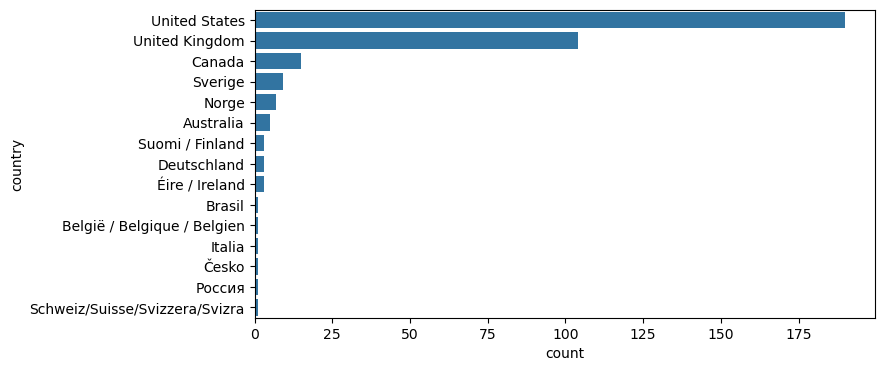

In [53]:
order = df_artists_origins_coordinates_concat['country'].value_counts().index
print(df_artists_origins_coordinates_concat['country'].value_counts().head())

plt.figure(figsize=(8,4))
sns.countplot(df_artists_origins_coordinates_concat['country'], order=order)

104 Brittish artists
59 Brittish cities

city
London             30
Glasgow             6
Liverpool           4
Manchester          4
Hemel Hempstead     2
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='city'>

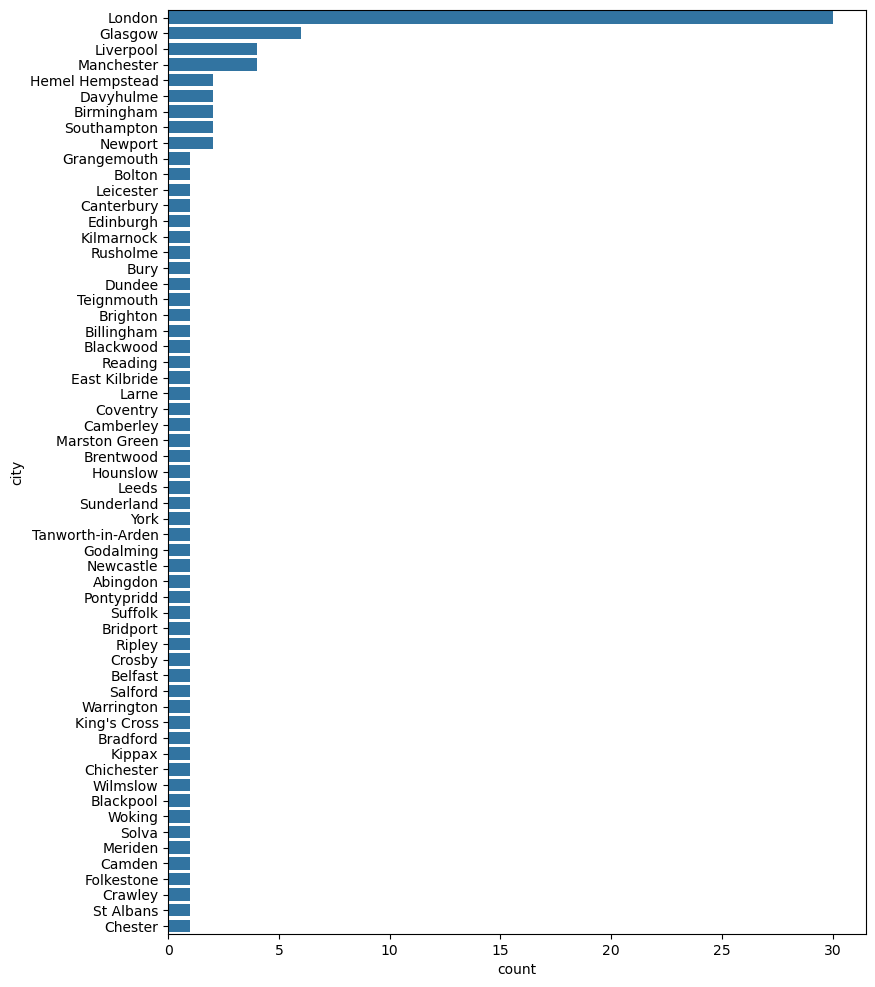

In [58]:
print(f"{brittish_cities.shape[0]} Brittish artists")
order = brittish_cities['city'].value_counts().index
print(f"{brittish_cities['city'].nunique()} Brittish cities\n")
print(brittish_cities['city'].value_counts().head())

plt.figure(figsize=(9,12))
sns.countplot(brittish_cities['city'], order=order)

190 American artists
116 American cities

city
Los Angeles      16
New York City    12
San Francisco     7
Chicago           5
Omaha             4
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='city'>

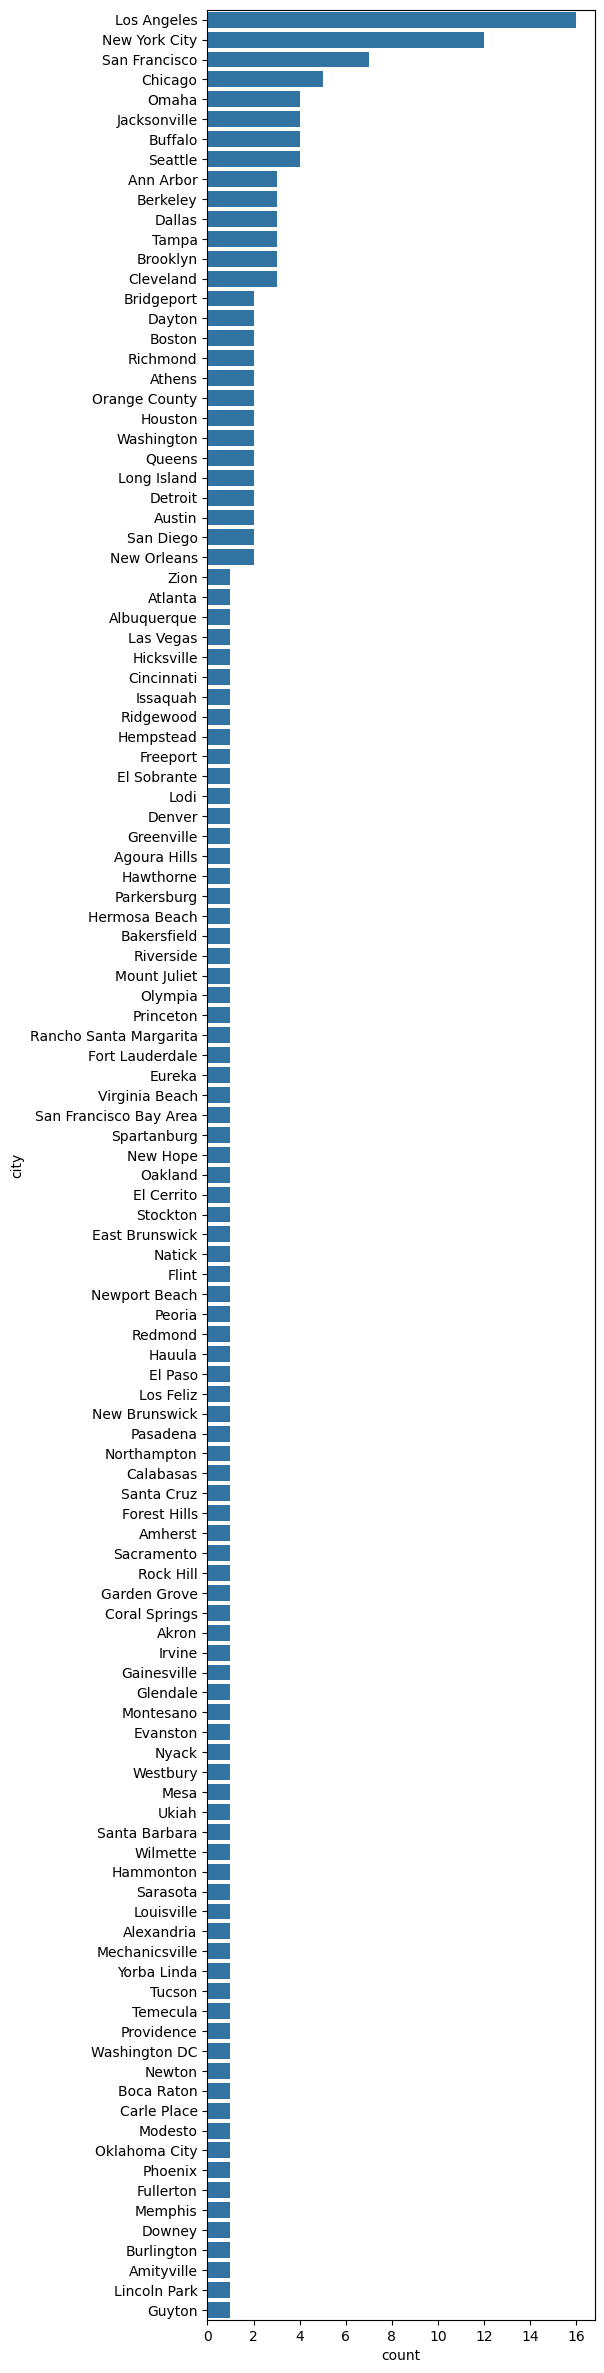

In [57]:
print(f"{american_cities.shape[0]} American artists")
order = american_cities['city'].value_counts().index
print(f"{american_cities['city'].nunique()} American cities\n")
print(american_cities['city'].value_counts().head())

plt.figure(figsize=(5,30))
sns.countplot(df_artists_origins_coordinates_concat[df_artists_origins_coordinates_concat['country']=='United States']['city'], order=order)

# All separate codes without functions

## Actual code to get the origins from Wikipedia

In [42]:
artists_list, origin_list = get_origins_wikipedia(df, 20, 50)

Bingo! df_coordinates.csv found 

1/1 - The_New_Pornographers: Vancouver, British Columbia, Canada
2/2 - Regurgitator_(band): Brisbane, Queensland, Australia
3/3 - Sunny_Day_Real_Estate: Seattle, Washington, U.S.
4/4 - ...And_You_Will_Know_Us_by_the_Trail_of_Dead: Austin, Texas, U.S.
5/5 - Children_of_Bodom_(band): Espoo, Finland
6/6 - Audioslave: Glendale, California, U.S.
7/7 - Led_Zeppelin_(band): London, England
8/8 - Less_Than_Jake_(band): Gainesville, Florida, U.S.
9/9 - Alexisonfire: St. Catharines, Ontario, Canada
10/10 - Rammstein: Berlin, Germany
11/11 - Thrice_(band): Irvine, California, U.S.
12/12 - Lostprophets: Pontypridd, Wales
13/13 - New_Found_Glory_(band): Coral Springs, Florida, U.S.
14/14 - Placebo_(band): London, England
15/15 - Box_Car_Racer: San Diego, California, U.S.
16/16 - Thursday_(band): New Brunswick, New Jersey, U.S.
17/17 - Million_Dead: London, England
18/18 - The_Jesus_Lizard: Austin, Texas, U.S.
19/19 - The_Offspring_(band): Garden Grove, California, 

## Saving the data into a dataframe

In [43]:
df_artists_origins = pd.DataFrame({'artist': artists_list
                             , 'origin': origin_list})
df_artists_origins.shape

(30, 2)

In [44]:
df_artists_origins

,artist,origin
0,The New Pornographers,"Vancouver, British Columbia, Canada"
1,Regurgitator,"Brisbane, Queensland, Australia"
2,Sunny Day Real Estate,"Seattle, Washington, U.S."
3,...And You Will Know Us by the Trail of Dead,"Austin, Texas, U.S."
4,Children of Bodom,"Espoo, Finland"
5,Audioslave,"Glendale, California, U.S."
6,Led Zeppelin,"London, England"
7,Less Than Jake,"Gainesville, Florida, U.S."
8,Alexisonfire,"St. Catharines, Ontario, Canada"
9,Rammstein,"Berlin, Germany"


In [ ]:
# import the df with the artists' origins already scraped
df_artists_origins_scraped = pd.read_csv('Datasets/df_artists_origins.csv')
df_artists_origins_scraped.shape

(20, 2)

In [ ]:
# subset of the new artists I just got
df_new_artists = df_artists_origins[~df_artists_origins['artist'].isin(df_artists_origins_scraped['artist'].values)]
df_new_artists

,artist,origin
0,The New Pornographers,"Vancouver, British Columbia, Canada"
1,Regurgitator,"Brisbane, Queensland, Australia"
2,Sunny Day Real Estate,"Seattle, Washington, U.S."
3,...And You Will Know Us by the Trail of Dead,"Austin, Texas, U.S."
4,Children of Bodom,"Espoo, Finland"
5,Audioslave,"Glendale, California, U.S."
6,Led Zeppelin,"London, England"
7,Less Than Jake,"Gainesville, Florida, U.S."
8,Alexisonfire,"St. Catharines, Ontario, Canada"
9,Rammstein,"Berlin, Germany"


In [ ]:
# concat with the df I just got
df_artists_origins_concat = pd.concat([df_artists_origins_scraped, df_new_artists])
df_artists_origins_concat.reset_index(drop=True, inplace=True)
df_artists_origins_concat.shape

(50, 2)

I want to already export it to a .csv file so that later I can check the ``origin`` the next time I run the function and compare if I have scraped that origin already or not.

In [ ]:
# export all the artists and their origins to a .csv file (the ones I got plus the new artists)
df_artists_origins_concat.to_csv('Datasets/df_artists_origins.csv', index=False)

## ``origin`` cleaning: dots, [ ]...

The next thing I'm gonna do is cleaning the origin, because Geopy doesn't read correctly characters like "U.S.".

**Clean the ``origin`` column of all the artists, so I can look for the coordinates with Geopy**

In [50]:
df_new_artists.shape

(30, 2)

In [52]:
# replace special characters for spaces
df_new_artists['origin_clean'] = df_new_artists['origin'].str.replace('.', '')
df_new_artists['origin_clean'] = df_new_artists['origin_clean'].str.replace(r'\[\d+\]', '', regex=True)

# show the df to check it has been changed correctly
df_new_artists.tail()

,artist,origin,origin_clean
25,KISS,"New York City, U.S.","New York City, US"
26,The Polyphonic Spree,"Dallas, Texas, United States","Dallas, Texas, United States"
27,Cake,"Sacramento, California, U.S.","Sacramento, California, US"
28,Dinosaur Jr.,"Amherst, Massachusetts, U.S.","Amherst, Massachusetts, US"
29,U2,"Dublin, Ireland","Dublin, Ireland"


## Concat with the previous df

In [59]:
# import the last df that contains the coordinates of the unique origins
df_coordinates_scraped = pd.read_csv('Datasets/df_coordinates.csv')
df_coordinates_scraped.shape

(42, 7)

In [62]:
df_coordinates_scraped.head()

,country,city,origin,origin_clean,latitude,longitude,address
0,Australia,Brisbane,"Brisbane, Queensland, Australia","Brisbane, Queensland, Australia",-27.468968,153.023499,"City of Brisbane, Queensland, Australia"
1,Canada,St Catharines,"St. Catharines, Ontario, Canada","St Catharines, Ontario, Canada",43.157981,-79.244100,"St. Catharines, Niagara Region, Golden Horsesh..."
2,Canada,Vancouver,"Vancouver, British Columbia, Canada","Vancouver, British Columbia, Canada",49.260872,-123.113952,"Vancouver, Metro Vancouver Regional District, ..."
3,Deutschland,Berlin,"Berlin, Germany","Berlin, Germany",52.510885,13.398937,"Berlin, Pankow, Deutschland"
4,Suomi / Finland,Espoo,"Espoo, Finland","Espoo, Finland",60.204965,24.655981,"Espoo, Helsingin seutukunta, Uusimaa, Manner-S..."


In [ ]:
# concat with the df of the coordinates I just got
df_coordinates_concat = pd.concat([df_coordinates_scraped, df_coordinates])
df_coordinates_concat.sort_values(['country', 'city'], inplace=True) # sort by country and city
df_coordinates_concat.reset_index(drop=True, inplace=True)
df_coordinates_concat.shape

(43, 7)

In [59]:
# look for duplicates in the origin, between the locations I had already gotten and the new ones
check_duplicates_origins(df_coordinates_concat)

Found 1 duplicates:
     city         country
9  London  United Kingdom

Resulting dataset: (42, 7)


In [60]:
# save it in a csv file (the coordinates I had plus the ones from the new artists I just got)
df_coordinates_concat.to_csv('Datasets/df_coordinates.csv', index=False)

## **Merge ``origin`` with ``coordinates``**

In [66]:
df_new_artists

,artist,origin,origin_clean
0,The Clash,"London, England","London, England"
1,Darkthrone,"Kolbotn, Akershus, Norway","Kolbotn, Akershus, Norway"
2,Ramones,"Forest Hills, Queens, New York, U.S.","Forest Hills, Queens, New York, US"
3,Comets on Fire,"Santa Cruz, California, U.S.","Santa Cruz, California, US"
4,Fenix TX,"Houston, Texas, U.S.","Houston, Texas, US"
5,Incubus,"Calabasas, California, U.S.","Calabasas, California, US"
6,Feeder,"Newport, Wales","Newport, Wales"
7,PJ Harvey,"Bridport, Dorset, England","Bridport, Dorset, England"
8,Sebadoh,"Northampton, Massachusetts, U.S.","Northampton, Massachusetts, US"
9,Blind Faith,"Ripley, Surrey, England","Ripley, Surrey, England"


In [62]:
# merge with the previous df with the artists
df_artists_origins_coordinates = pd.merge(df_new_artists, df_coordinates_concat, on=['origin'])
df_artists_origins_coordinates.drop(columns=['origin', 'origin_clean_x', 'origin_clean_y'], inplace=True)

df_artists_origins_coordinates

,artist,country,city,latitude,longitude,address
0,The New Pornographers,Canada,Vancouver,49.260872,-123.113952,"Vancouver, Metro Vancouver Regional District, ..."
1,Regurgitator,Australia,Brisbane,-27.468968,153.023499,"City of Brisbane, Queensland, Australia"
2,Sunny Day Real Estate,United States,Seattle,47.603832,-122.330062,"Seattle, King County, Washington, United States"
3,...And You Will Know Us by the Trail of Dead,United States,Austin,30.271129,-97.743700,"Austin, Travis County, Texas, United States"
4,Children of Bodom,Suomi / Finland,Espoo,60.204965,24.655981,"Espoo, Helsingin seutukunta, Uusimaa, Manner-S..."
5,Audioslave,United States,Glendale,34.146942,-118.247847,"Glendale, Los Angeles County, California, Unit..."
6,Led Zeppelin,United Kingdom,London,51.489334,-0.144055,"London, Greater London, England, United Kingdom"
7,Less Than Jake,United States,Gainesville,29.651968,-82.324985,"Gainesville, Alachua County, Florida, United S..."
8,Alexisonfire,Canada,St Catharines,43.157981,-79.244100,"St. Catharines, Niagara Region, Golden Horsesh..."
9,Rammstein,Deutschland,Berlin,52.510885,13.398937,"Berlin, Pankow, Deutschland"


In [63]:
# locations of the new artists
df_artists_origins_coordinates['country'].value_counts()

country
United States      18
United Kingdom      5
Canada              2
Éire / Ireland      2
Australia           1
Suomi / Finland     1
Deutschland         1
Name: count, dtype: int64

In [ ]:
# import the df that contains info of the artists and the coordinates of their origins
df_artists_origins_coordinates_scraped = pd.read_csv('Datasets/df_artists_origins_coordinates.csv')
df_artists_origins_coordinates_scraped

,artist,country,city,latitude,longitude,address
0,Sparta,United States,El Paso,31.760116,-106.487040,"El Paso, El Paso County, Texas, United States"
1,Muse,United Kingdom,Teignmouth,50.546338,-3.495780,"Teignmouth, Teignbridge, Devon, England, Unite..."
2,Finch,United States,Temecula,33.494635,-117.147366,"Temecula, Riverside County, California, United..."
3,Transplants,United States,Los Angeles,34.053691,-118.242766,"Los Angeles, Los Angeles County, California, U..."
4,Rooney,United States,Los Angeles,34.053691,-118.242766,"Los Angeles, Los Angeles County, California, U..."
5,The Cure,United Kingdom,Crawley,51.110344,-0.180109,"Crawley, West Sussex, England, United Kingdom"
6,AFI,United States,Ukiah,39.150166,-123.207786,"Ukiah, Mendocino County, California, 95482, Un..."
7,Jimmy Eat World,United States,Mesa,33.415101,-111.831455,"Mesa, Maricopa County, Arizona, United States"
8,Black Sabbath,United Kingdom,Birmingham,52.479699,-1.902691,"Birmingham, West Midlands, England, United Kin..."
9,Yes,United Kingdom,London,51.489334,-0.144055,"London, Greater London, England, United Kingdom"


In [ ]:
df_artists_origins_coordinates_concat = pd.concat([df_artists_origins_coordinates_scraped, df_artists_origins_coordinates])
df_artists_origins_coordinates_concat.reset_index(drop=True, inplace=True)
df_artists_origins_coordinates_concat

,artist,country,city,latitude,longitude,address
0,Sparta,United States,El Paso,31.760116,-106.487040,"El Paso, El Paso County, Texas, United States"
1,Muse,United Kingdom,Teignmouth,50.546338,-3.495780,"Teignmouth, Teignbridge, Devon, England, Unite..."
2,Finch,United States,Temecula,33.494635,-117.147366,"Temecula, Riverside County, California, United..."
3,Transplants,United States,Los Angeles,34.053691,-118.242766,"Los Angeles, Los Angeles County, California, U..."
4,Rooney,United States,Los Angeles,34.053691,-118.242766,"Los Angeles, Los Angeles County, California, U..."
5,The Cure,United Kingdom,Crawley,51.110344,-0.180109,"Crawley, West Sussex, England, United Kingdom"
6,AFI,United States,Ukiah,39.150166,-123.207786,"Ukiah, Mendocino County, California, 95482, Un..."
7,Jimmy Eat World,United States,Mesa,33.415101,-111.831455,"Mesa, Maricopa County, Arizona, United States"
8,Black Sabbath,United Kingdom,Birmingham,52.479699,-1.902691,"Birmingham, West Midlands, England, United Kin..."
9,Yes,United Kingdom,London,51.489334,-0.144055,"London, Greater London, England, United Kingdom"


In [66]:
# save it in a csv file
df_artists_origins_coordinates_concat.to_csv('Datasets/df_artists_origins_coordinates.csv', index=False)

In [67]:
df_artists_origins_coordinates_concat.country.value_counts()

country
United States      30
United Kingdom     13
Canada              2
Éire / Ireland      2
Australia           1
Suomi / Finland     1
Deutschland         1
Name: count, dtype: int64